# Modeling Topics

In [1]:
# IMPORTS
import pandas as pd 
from pathlib import Path

# For LDA Topic Models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# For NMF Topic Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
# CUSTOM FUNCTIONS

# To see the N number of top words in a topic
# To use this function: display_topics(model, vocabulary, N_topics)
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "{:d}: ".format(topic_idx)
        message += " ".join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ','
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [3]:
# DATA
screenplays = []
for p in Path('../queue/scifi/').glob('*.txt'):
    with open(p, encoding="utf8", errors='ignore') as f:
        contents = f.read()
        screenplays.append(contents)

# While we're at it, let's grab file names
titles= []
for p in Path('../queue/scifi/').glob('*.txt'):
    with open(p, encoding="utf8", errors='ignore') as f:
        title = p.name[:-4]
        titles.append(title)

# Check our work
print(len(screenplays))
print(len(titles))

155
155


## Iterative Processes

### LDA Topic Model

In [4]:
# Create a basic DTM (no parameters)
# in order to see how many possible dimensions we have
vectorizer = CountVectorizer( )

# fit the model to the data 
dtm = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# This will repeat our screenplay count
# but also report our overall vocabulary FOR ALL SCREENPLAYS
dtm.shape

(155, 54106)

In [5]:
# See what the DTM looks like:
# Load up a dataframe with our DTM
df = pd.DataFrame(dtm.toarray(), 
                  columns = vocabulary)

# Check our work:
df.shape
df.head()

,00,000,0000,000001,000047,0002921,000321252,00032125262632,0004212232,00065,...,zzz,zzzaaaappp,zzzap,zzzwhap,zzzzing,zzzzz,zzzzzz,zzzzzzam,zzzzzzzz,zzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
lda = LDA(n_components=15,
          max_iter=5,
          random_state=0)

model = lda.fit_transform(dtm)

In [7]:
# REMINDER: display_topics(model, vocabulary, N_topics)
display_topics(lda, vocabulary, 5)

0: the 87358.23, to 28674.62, and 27470.84, of 25245.61, in 17284.67,
1: nits 0.07, tory 0.07, guessin 0.07, allen 0.07, quieting 0.07,
2: the 7062.32, to 2816.45, you 2371.32, and 2304.82, it 1807.55,
3: the 1934.89, nick 843.93, to 621.29, victor 618.56, and 475.93,
4: the 3186.02, to 1354.89, of 1022.26, and 949.07, it 900.7,
5: the 3524.81, and 1546.87, to 1196.8, paul 1125.69, graham 1118.81,
6: the 15226.86, and 5269.75, to 5188.19, of 4095.88, it 3946.38,
7: the 12018.08, to 4309.85, and 4200.5, of 3200.77, you 2868.42,
8: nits 0.07, tory 0.07, guessin 0.07, allen 0.07, quieting 0.07,
9: the 33420.96, to 12966.21, and 11453.49, of 9827.04, you 8203.88,
10: conway 622.85, george 362.13, shot 350.88, chang 181.13, barnard 177.0,
11: julius 0.07, linda 0.07, vince 0.07, twins 0.07, rev 0.07,
12: the 27981.87, to 10285.01, and 9655.03, of 8108.05, in 6043.82,
13: the 19135.2, to 6555.87, and 5667.89, of 5254.07, you 4042.78,
14: the 16837.26, to 6522.56, and 5561.18, of 4435.7, you 

In [14]:
# Create a basic DTM (no parameters)
vectorizer = CountVectorizer(min_df = 5,
                             stop_words = 'english',
                             max_df = 0.9 )
dtm = vectorizer.fit_transform(screenplays)
vocabulary = vectorizer.get_feature_names_out()

# Create a basic LDA model
lda = LDA(n_components=30,
          max_iter=5,
          random_state=0)
model = lda.fit_transform(dtm)

# Check topics:
display_topics(lda, vocabulary, 5)

0: grant 948.89, star 616.78, billy 585.8, peter 538.01, continued 415.75,
1: reed 583.03, ben 549.08, sue 351.0, victor 329.03, smith 300.03,
2: rick 649.22, hot 276.94, rod 267.71, angle 206.81, julie 174.72,
3: kirk 1728.93, spock 722.63, blade 648.78, enterprise 577.51, bridge 409.31,
4: chris 412.89, continuing 343.48, edgar 257.87, jones 228.03, mary 219.32,
5: priest 569.88, car 484.74, standard 458.37, ted 433.84, angle 430.55,
6: jay 954.51, kay 941.58, caesar 553.3, cont 341.77, eve 340.54,
7: rachel 530.51, earl 448.03, burt 184.75, mark 178.51, sue 133.54,
8: eddie 1138.64, continued 793.34, victor 683.72, julie 278.62, creature 278.1,
9: joe 1552.86, jake 1365.48, cont 373.73, charles 373.25, grace 307.81,
10: arthur 880.94, arlington 161.03, cont 149.1, walter 138.64, house 105.38,
11: lincoln 481.68, nick 383.86, audrey 238.03, raymond 209.2, animal 185.33,
12: ray 818.48, andrew 536.87, paul 494.84, graham 493.63, grant 429.22,
13: president 464.95, david 372.55, brad 2

### NMF Topic Model

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

```
tf-idf = tf * idf
idf(t) = log [ n / (df(t) + 1) ])
```

In [23]:
# Let's run a minimal change of parameters
# and words that occur in only one text
# NOTA BENE: We are using the same variable names as above 

# Create a basic DTM (no parameters)
# in order to see how many possible dimensions we have
vectorizer = TfidfVectorizer(lowercase = True,
                             min_df = 15,
                             stop_words='english')

# fit the model to the data 
dtm = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# see how many features we have
dtm.shape

(155, 8226)

In [26]:
# First topic model: NMF
nmf = NMF(n_components=5, 
          max_iter=500).fit(dtm)
nmf_W = nmf.transform(dtm)
nmf_H = nmf.components_
nmf_W.shape

(155, 5)

In [28]:
display_topics(nmf, vocabulary, 5)

0: int 0.69, like 0.46, looks 0.43, ext 0.38, just 0.38,
1: continued 1.13, cont 0.37, ford 0.19, int 0.18, day 0.17,
2: david 1.2, president 0.23, int 0.2, harry 0.17, ship 0.16,
3: nick 1.39, eddie 0.17, animal 0.13, banner 0.09, just 0.09,
4: john 1.32, smith 0.26, int 0.14, night 0.13, west 0.11,



## Estimation Process

In [29]:
# IMPORT
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300

In [30]:
wcss = [] 
for i in range(1, 30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dtm) 
    wcss.append(kmeans.inertia_)

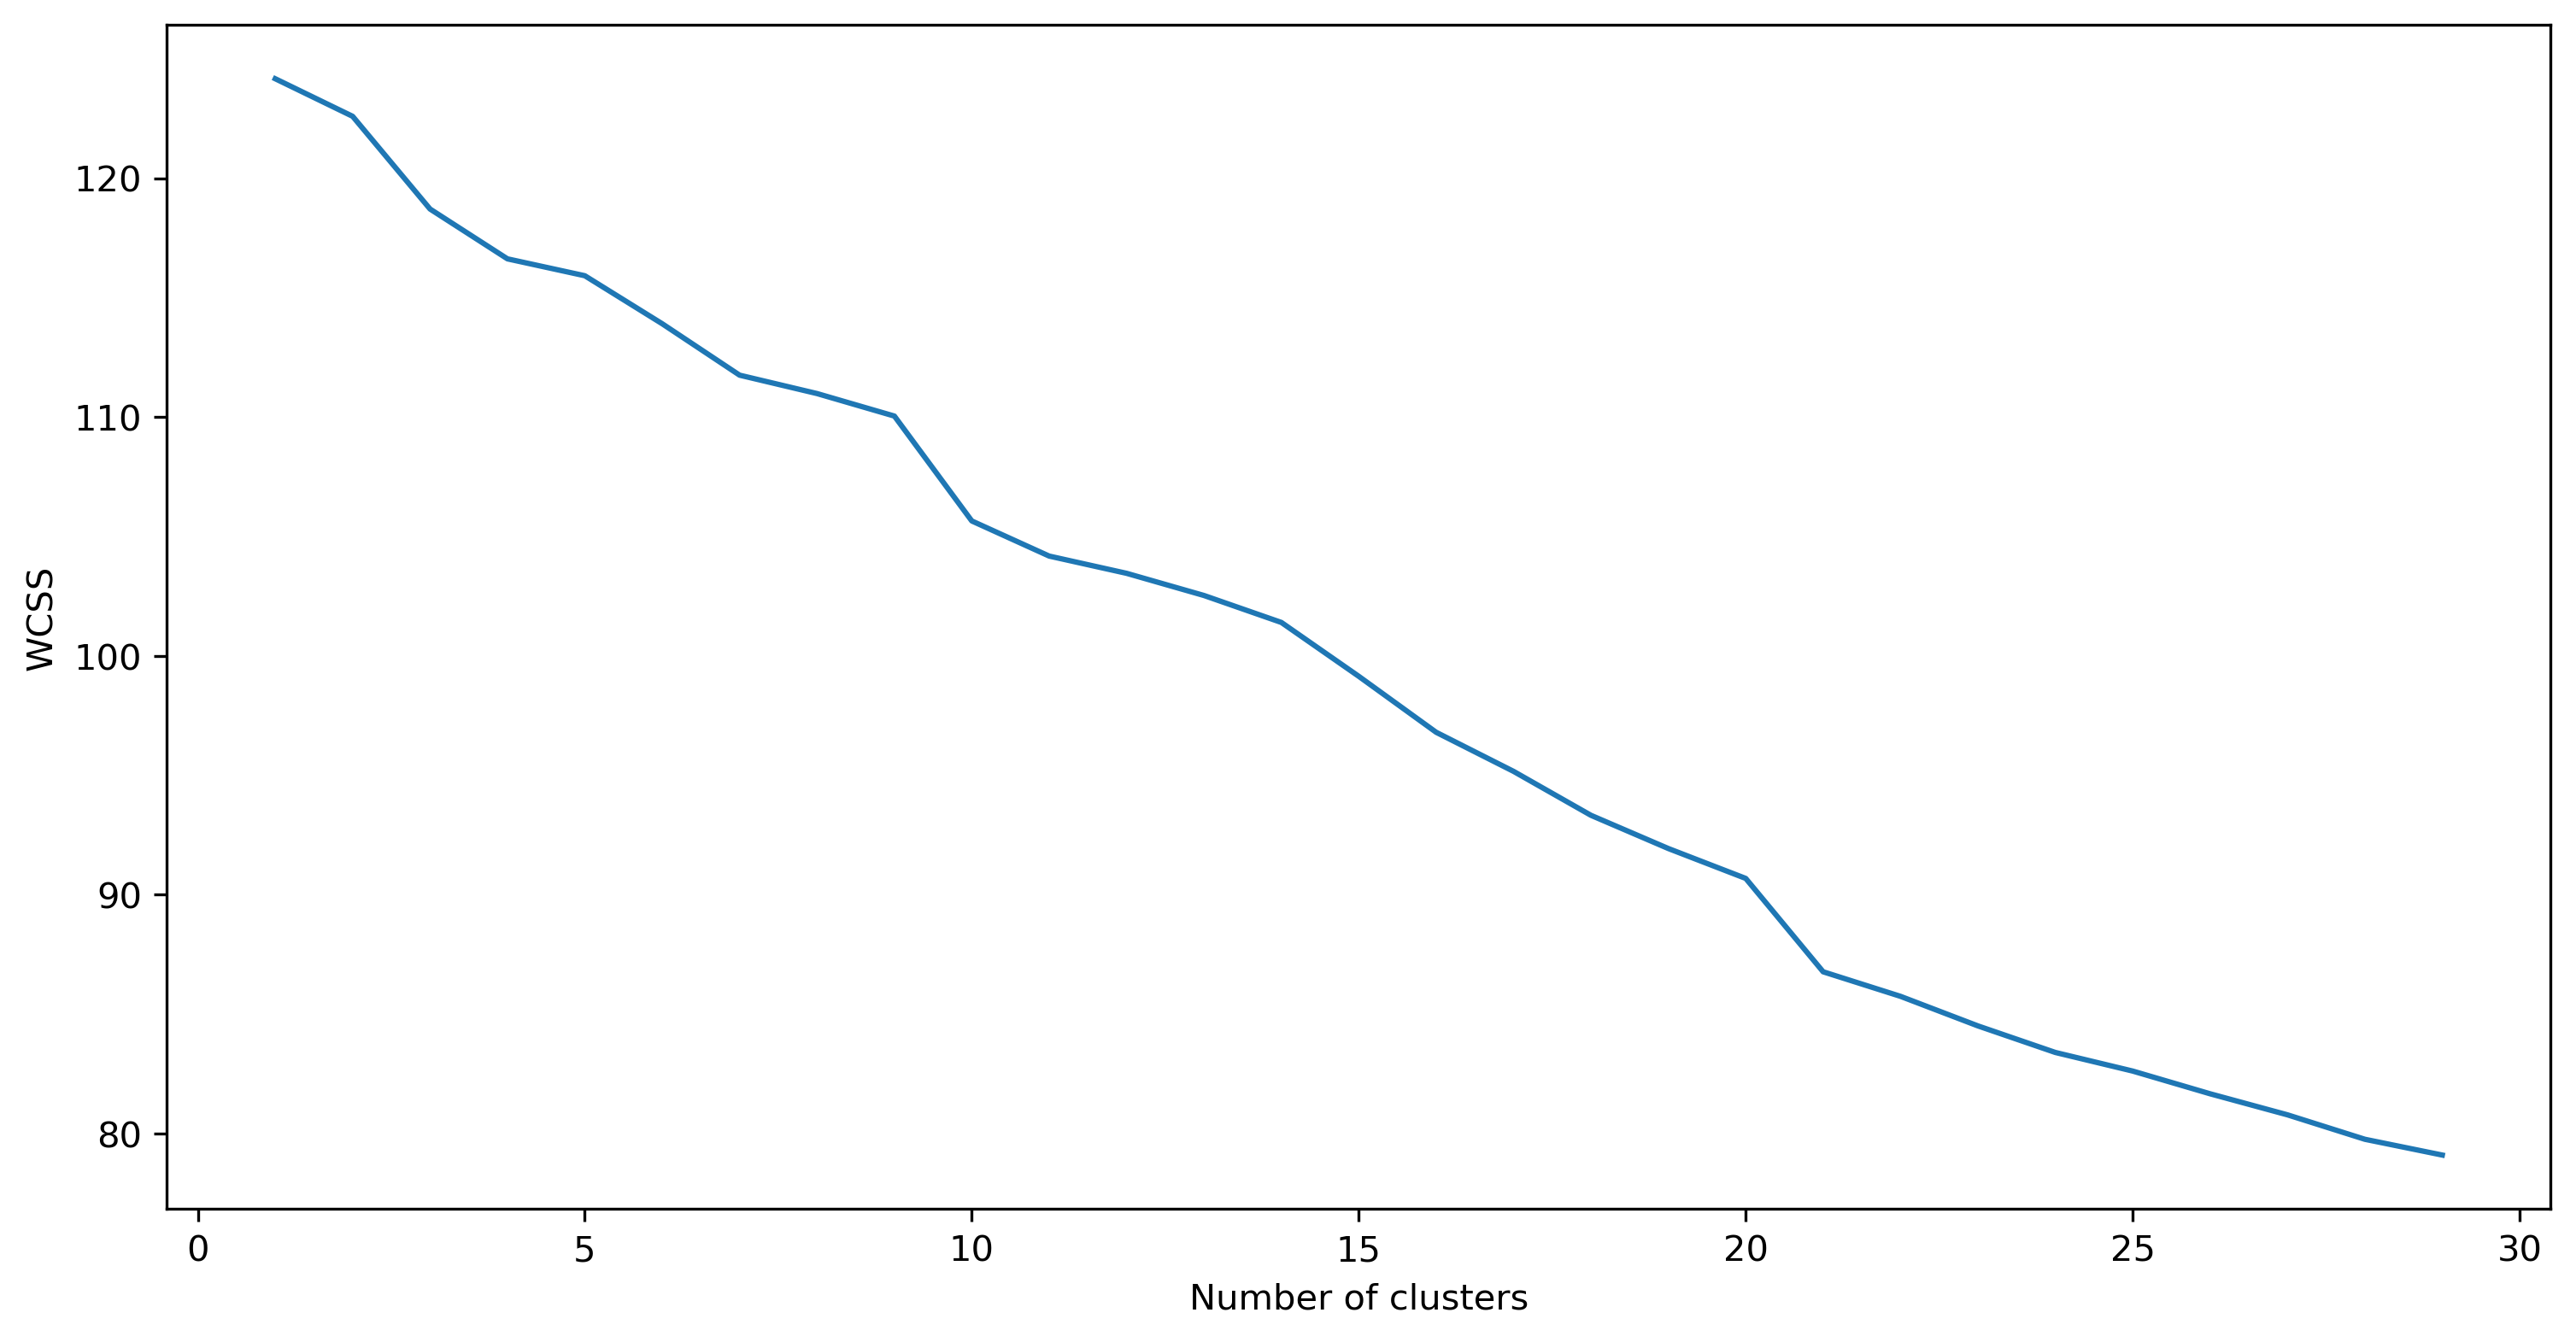

In [31]:
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters = 20, init = "k-means++", random_state = 42)
# y_kmeans = kmeans.fit_predict(matrix)